# FLASK
<br>
<div>
<img src="images/Flask_logo.png" width = "300"/>
</div>

## Outline
- Pendahuluan Flask
- Contoh Pengaplikasian Flask

## Apa itu flask?

Flask adalah sebuah web framework jenis microframework yang ditulis dengan bahasa Python yang berfungsi sebagai kerangka kerja aplikasi dan tampilan dari suatu web.

detail
- https://ar-android.github.io/belajar-flask/tutorial/pengenalan-flask.html
- https://code.tutsplus.com/id/tutorials/an-introduction-to-pythons-flask-framework--net-28822
- https://www.tutorialspoint.com/flask/index.htm

## Sejarah Flask

- Pada tahun 2004, Pocoo dibentuk sebagai sebuah kelompok penggemar Python internasional. Flask dikembangkan secara tidak sengaja oleh Armin Ronacher dari Pocoo yang berawal dari lelucon April Mop. 
- Pada pertengahan tahun 2016, Flask menjadi kerangka kerja aplikasi web versi Python yang terpopuler di Github.

<img src="images/armin_ronacher.jpg" width = "300"/>


detail
- https://id.m.wikipedia.org/wiki/Flask

### Kelebihan
1. Mudah dipahami
2. Fleksibel

### Kekurangan
1. Tidak memiliki database layer bawaan, sehingga harus menggunakan aplikasi dari pihak ketiga

# Contoh Aplikasi Flask

## Import Modul

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

In [2]:
!pip install config
!pip install psycopg2
import psycopg2
import config as creds
import pandas as pd

You are using pip version 19.0.3, however version 21.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 21.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Connect dari PostgreSQL

In [3]:
def connect():
    # Set up a connection to the postgres server.
    conn_string = "host="+ "localhost" +" port="+ "5432" +" dbname="+ "flask" +" user=" + "postgres" \
                  +" password="+ "12345"
    
    conn = psycopg2.connect(conn_string)
    print("Connected!")

    # Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor

In [4]:
conn, cursor = connect()

#Insert
abc = ('''INSERT INTO "barang"(stock, harga) VALUES (5,5000),(10,10000), (15,15000), (20,20000), (25,25000), (30,30000)''')
cursor.execute(abc)

#Tampil
abc = ('''SELECT * FROM "barang" ''')
cursor.execute(abc)
results = cursor.fetchall()
print(results)

conn.commit()

Connected!
[(1, 5000, 5), (2, 10000, 10), (3, 15000, 15), (4, 20000, 20), (5, 25000, 25), (6, 30000, 30), (7, 5000, 5), (8, 10000, 10), (9, 15000, 15), (10, 20000, 20), (11, 25000, 25), (12, 30000, 30)]


## Membuat dataset simple

X = Stock <br>
Y = Harga

In [6]:
X= []
Y = []
for i, row in enumerate(results):
    X.append(row[2])
    Y.append(row[1])

In [7]:
X = np.array(X)
Y = np.array(Y)
data = pd.DataFrame({'Stock':X, 'Harga':Y})

In [8]:
data.head()

,Stock,Harga
0,5,5000
1,10,10000
2,15,15000
3,20,20000
4,25,25000


Text(0.5,1,'Regression Plot Barang')

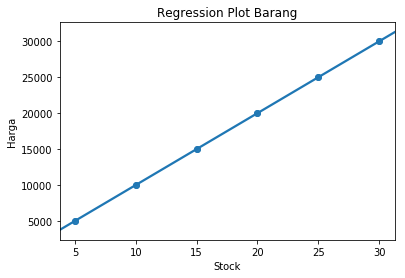

In [9]:
sns.regplot(x='Stock', y='Harga', data=data)
plt.title("Regression Plot Barang")

## Membuat Model

In [10]:
model = LinearRegression().fit(X.reshape(-1, 1), Y)

In [11]:
filename = "model.sav"
joblib.dump(model, filename)

['model.sav']

In [12]:
filename = "model.sav"
joblib.dump(model, filename)

['model.sav']

In [14]:
loaded_model = joblib.load(filename)

In [15]:
loaded_model.predict([[20]])

array([20000.])